### Library

In [6]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

import warnings
warnings.filterwarnings("error")

#for window
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# for ubuntu
#plt.rcParams["font.family"] = 'NanumBarunGothic'

#plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

### Color Reference

In [7]:
# Color Reference
TV_colors = ['rosybrown', 'lightcoral', 'indianred', 'brown']
PC_colors = ['goldenrod', 'goldenrod', 'gold', 'khaki']
microwave = ['lighseagreen', 'aqua', 'turquoise', 'lightcyan']
air_fryer = ['yellowgreen', 'chartreuse', 'palegreen', 'lightgreen', 'darkseagreen']
hair_dryer = ['mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet']
airconditioner = ['violet', 'hotpink']

### Functions

#### Data Loading

In [17]:
def load_df(dong,ho):
        
    real_power_file_name = 'new_data/' + dong + "_" + ho + '_appliances(real)_environment(real)_and_houseload(cum).csv'
    cum_power_file_name = 'data/CCM/' + dong + "_" + ho + '_appliances(cum)_and_houseload(cum).csv'

    df_real_appliance = pd.read_csv(real_power_file_name, index_col='Unnamed: 0', infer_datetime_format=True)
    df_real_appliance.index = pd.to_datetime(df_real_appliance.index)

    df_cum_appliance = pd.read_csv(cum_power_file_name, index_col='Unnamed: 0', infer_datetime_format=True)
    df_cum_appliance.index = pd.to_datetime(df_cum_appliance.index)

    ccm_columns = df_cum_appliance.columns[:-1]

    return df_real_appliance, df_cum_appliance, ccm_columns


# control_file_name = 'data/control.csv'
# df_control = pd.read_csv(control_file_name,infer_datetime_format=True)


# Color Setting
def color_setting(ccm_columns):
    color_set = {"PMM" : 'gray',
            "TV" : 'rosybrown',
            "공기청정기" : 'lightpink',
            "PC" : 'goldenrod',
            "밥솥" : 'turquoise',
            "전기밥솥" : 'turquoise',
            "에어컨" : 'violet',
            "선풍기" : 'steelblue',
            "선풍기2" : 'steelblue',
            "선풍기3" : 'steelblue',
            "세탁기" : 'orange'}

    colors = {}

    for col in ccm_columns:
        # print(col)
        if col[:col.find('(')] in color_set:
            # print(color_set[col[:col.find('(')]]+"\n")
            colors[col] = color_set[col[:col.find('(')]]
        else:
            # print("wheat\n")
            colors[col] ="wheat"
    return colors


def plot_monthly(df_cum_appliance,ccm_columns,colors):
    monthly_appliance_usage = df_cum_appliance[ccm_columns].groupby([df_cum_appliance.index.year, df_cum_appliance.index.month]).max()

    plt.figure(figsize=(20, 7))
    ax = monthly_appliance_usage.plot(kind='barh', stacked=True, title=f"{dong}-{ho} : 월별 가전기기 사용량", 
                                    rot=0, figsize=(20, 7), fontsize=20,
                                    color=colors,align='edge', edgecolor='#eee')

    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=45)

    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.box(True)
    plt.show()


def analysis(dong,ho):
    df_real_appliance, df_cum_appliance, ccm_columns = load_df(dong,ho)
    colors = color_setting(ccm_columns)
    plot_monthly(df_cum_appliance,ccm_columns,colors)
    
    usm_li = []
    for item in df_real_appliance.columns:
        if 'presence' in item:
            usm_li.append(item)

    display(usm_li)

#### EDA (normal)

In [18]:
def EDA(start_time,end_time,real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho):
    # 60 mins
    fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))




    
    # First Plot
    # 순시전력
    lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                    color='red', 
                    marker = 's',
                    markersize=3,
                    linestyle = "dashed",
                    label=real_power_appliance)

    # 재실유무 패턴 시각화
    ax1.fill_between(df_real_appliance[presence_USM].index, 0, 100, 
                    where=df_real_appliance[presence_USM] == 1,
                    color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                    label="Presence")


    # Control Dataset Masking

    control_file_name = 'data/control.csv'
    df_control = pd.read_csv(control_file_name,index_col="Unnamed: 0",infer_datetime_format=True)
    df_control.index = pd.to_datetime(df_control.index)

    # Sunday
    ax1.fill_between(df_control['Su'].index, 0, 100, 
                where=df_control['Su'] == 1,
                color='red', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Sa'].index, 0, 100, 
                where=df_control['Sa'] == 1,
                color='red', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Mo'].index, 0, 100, 
                where=df_control['Mo'] == 1,
                color='green', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Tu'].index, 0, 100, 
                where=df_control['Tu'] == 1,
                color='blue', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['We'].index, 0, 100, 
                where=df_control['We'] == 1,
                color='yellow', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Th'].index, 0, 100, 
                where=df_control['Th'] == 1,
                color='orange', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Fr'].index, 0, 100, 
                where=df_control['Fr'] == 1,
                color='purple', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
    ax1.set_ylim(0, df_real_appliance[real_power_appliance].max())
    ax1.set_xlabel('date', fontsize=17)
    ax1.set_ylabel('W', fontsize=17)
    ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
    ax1.tick_params(axis = 'y', labelsize = 12)
    ax1.grid(linewidth=0.3)

    ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

    # Second Plot
    ax2 = ax1.twinx()

    # 누적전력량 시각화
    lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                    color='orange', 
                    marker = 's',
                    markersize=3,
                    linestyle = "dashed",
                    label=cum_power_appliance)

    ax2.set_ylabel('kWh', fontsize=17)
    ax2.set_ylim([0, df_cum_appliance[cum_power_appliance][start_time:end_time].max()])
    ax2.tick_params(axis = 'y', labelsize = 12)

    # added these two lines
    lns = lns1+lns2 #+lns3

    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc="upper right", fontsize=12)
    #ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
    plt.tight_layout()
    plt.show()

    as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/(1000*12)#*(0.85)
    to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_real_appliance[start_time:end_time][presence_USM]).sum()/1000/12*(0.85)

    print(f"재실유무를 고려 X 사용량 : {round(as_is_power,3)} kWh")
    print(f"재실유무를 고려 O 사용량 : {round(to_be_power,3)} kWh")
    print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

#### EDA (no CUM data)

In [19]:
def EDA_noCUM(start_time,end_time,real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho):
    # 60 mins
    fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

    # First Plot
    # 순시전력
    lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                    color='red', 
                    marker = 's',
                    markersize=3,
                    linestyle = "dashed",
                    label=real_power_appliance)

    # 재실유무 패턴 시각화
    ax1.fill_between(df_real_appliance[presence_USM].index, 0, 100, 
                    where=df_real_appliance[presence_USM] == 1,
                    color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                    label="Presence")


    # Control Dataset Masking

    control_file_name = 'data/control.csv'
    df_control = pd.read_csv(control_file_name,index_col="Unnamed: 0",infer_datetime_format=True)
    df_control.index = pd.to_datetime(df_control.index)

    # Sunday
    ax1.fill_between(df_control['Su'].index, 0, 100, 
                where=df_control['Su'] == 1,
                color='red', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Sa'].index, 0, 100, 
                where=df_control['Sa'] == 1,
                color='red', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Mo'].index, 0, 100, 
                where=df_control['Mo'] == 1,
                color='green', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Tu'].index, 0, 100, 
                where=df_control['Tu'] == 1,
                color='blue', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['We'].index, 0, 100, 
                where=df_control['We'] == 1,
                color='yellow', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Th'].index, 0, 100, 
                where=df_control['Th'] == 1,
                color='orange', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Fr'].index, 0, 100, 
                where=df_control['Fr'] == 1,
                color='purple', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")




    ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
    ax1.set_ylim(0, df_real_appliance[real_power_appliance].max())
    ax1.set_xlabel('date', fontsize=17)
    ax1.set_ylabel('W', fontsize=17)
    ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
    ax1.tick_params(axis = 'y', labelsize = 12)
    ax1.grid(linewidth=0.3)

    ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

    # Second Plot
    # ax2 = ax1.twinx()

    # # 누적전력량 시각화
    # lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
    #                 color='orange', 
    #                 marker = 's',
    #                 markersize=3,
    #                 linestyle = "dashed",
    #                 label=cum_power_appliance)

    # ax2.set_ylabel('kWh', fontsize=17)
    # ax2.set_ylim([0, df_cum_appliance[cum_power_appliance][start_time:end_time].max()])
    # ax2.tick_params(axis = 'y', labelsize = 12)

    # added these two lines
    lns = lns1#+lns2 #+lns3

    labs = [l.get_label() for l in lns]
    # ax2.legend(lns, labs, loc="upper right", fontsize=12)
    #ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
    plt.tight_layout()
    plt.show()

    as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/(1000*12)#*(0.85)
    to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_real_appliance[start_time:end_time][presence_USM]).sum()/1000/12*(0.85)

    print(f"재실유무를 고려 X 사용량 : {round(as_is_power,3)} kWh")
    print(f"재실유무를 고려 O 사용량 : {round(to_be_power,3)} kWh")
    print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

#### EDA (no USM data)

In [20]:
def EDA_noUSM(start_time,end_time,real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho):
    # 60 mins
    fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))

    # First Plot
    # 순시전력
    lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                    color='red', 
                    marker = 's',
                    markersize=3,
                    linestyle = "dashed",
                    label=real_power_appliance)

    # 재실유무 패턴 시각화
    # ax1.fill_between(df_real_appliance[presence_USM].index, 0, 100, 
    #                 where=df_real_appliance[presence_USM] == 1,
    #                 color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
    #                 label="Presence")



    # Control Dataset Masking

    control_file_name = 'data/control.csv'
    df_control = pd.read_csv(control_file_name,index_col="Unnamed: 0",infer_datetime_format=True)
    df_control.index = pd.to_datetime(df_control.index)

    # Sunday
    ax1.fill_between(df_control['Su'].index, 0, 100, 
                where=df_control['Su'] == 1,
                color='red', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Sa'].index, 0, 100, 
                where=df_control['Sa'] == 1,
                color='red', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Mo'].index, 0, 100, 
                where=df_control['Mo'] == 1,
                color='green', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Tu'].index, 0, 100, 
                where=df_control['Tu'] == 1,
                color='blue', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['We'].index, 0, 100, 
                where=df_control['We'] == 1,
                color='yellow', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Th'].index, 0, 100, 
                where=df_control['Th'] == 1,
                color='orange', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Fr'].index, 0, 100, 
                where=df_control['Fr'] == 1,
                color='purple', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")





    ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
    ax1.set_ylim(0, df_real_appliance[real_power_appliance].max())
    ax1.set_xlabel('date', fontsize=17)
    ax1.set_ylabel('W', fontsize=17)
    ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
    ax1.tick_params(axis = 'y', labelsize = 12)
    ax1.grid(linewidth=0.3)

    ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

    # Second Plot
    ax2 = ax1.twinx()

    # 누적전력량 시각화
    lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                    color='orange', 
                    marker = 's',
                    markersize=3,
                    linestyle = "dashed",
                    label=cum_power_appliance)

    ax2.set_ylabel('kWh', fontsize=17)
    ax2.set_ylim([0, df_cum_appliance[cum_power_appliance][start_time:end_time].max()])
    ax2.tick_params(axis = 'y', labelsize = 12)

    # added these two lines
    lns = lns1+lns2 #+lns3

    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc="upper right", fontsize=12)
    #ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
    plt.tight_layout()
    plt.show()

    as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/(1000*12)#*(0.85)
    # to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_real_appliance[start_time:end_time][presence_USM]).sum()/1000/12*(0.85)

    print(f"재실유무를 고려 X 사용량 : {round(as_is_power,3)} kWh")
    # print(f"재실유무를 고려 O 사용량 : {round(to_be_power,3)} kWh")
    # print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

#### EDA (Control Masking)

In [21]:
def EDA_control(start_time,end_time,real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho):
    # 60 mins
    fig, ax1 = plt.subplots(1, 1, figsize=(20, 5))


    
    # First Plot
    # 순시전력
    lns1 = ax1.plot(df_real_appliance[real_power_appliance].dropna(), 
                    color='red', 
                    marker = 's',
                    markersize=3,
                    linestyle = "dashed",
                    label=real_power_appliance)


    # Control Dataset Masking



    control_file_name = 'data/control.csv'
    df_control = pd.read_csv(control_file_name,index_col="Unnamed: 0",infer_datetime_format=True)
    df_control.index = pd.to_datetime(df_control.index)


    # Sunday
    ax1.fill_between(df_control['Su'].index, 0, 100, 
                where=df_control['Su'] == 1,
                color='red', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Sa'].index, 0, 100, 
                where=df_control['Sa'] == 1,
                color='red', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Mo'].index, 0, 100, 
                where=df_control['Mo'] == 1,
                color='green', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Tu'].index, 0, 100, 
                where=df_control['Tu'] == 1,
                color='blue', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['We'].index, 0, 100, 
                where=df_control['We'] == 1,
                color='yellow', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Th'].index, 0, 100, 
                where=df_control['Th'] == 1,
                color='orange', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")

    # Sunday
    ax1.fill_between(df_control['Fr'].index, 0, 100, 
                where=df_control['Fr'] == 1,
                color='purple', alpha=0.2, transform=ax1.get_xaxis_transform(),
                label="Presence")




    ax1.fill_between(df_control['Control1'].index, 0, 100, 
                    where=df_control['Control1'] == 1,
                    color='black', alpha=0.3, transform=ax1.get_xaxis_transform(),
                    label="Presence")

    ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
    ax1.set_ylim(0, df_real_appliance[real_power_appliance].max())
    ax1.set_xlabel('date', fontsize=17)
    ax1.set_ylabel('W', fontsize=17)
    ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
    ax1.tick_params(axis = 'y', labelsize = 12)
    ax1.grid(linewidth=0.3)

    ax1.set_title(dong + "-" + ho + " : " + real_power_appliance + " [W] / [kWh]" + "\n" +start_time[:10]+"~"+end_time[:10], fontsize=16, va='bottom', fontweight='semibold')

    # Second Plot
    ax2 = ax1.twinx()

    # 누적전력량 시각화
    lns2 = ax2.plot(df_cum_appliance[cum_power_appliance].dropna(), 
                    color='orange', 
                    marker = 's',
                    markersize=3,
                    linestyle = "dashed",
                    label=cum_power_appliance)

    ax2.set_ylabel('kWh', fontsize=17)
    ax2.set_ylim([0, df_cum_appliance[cum_power_appliance][start_time:end_time].max()])
    ax2.tick_params(axis = 'y', labelsize = 12)

    # added these two lines
    lns = lns1+lns2 #+lns3

    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc="upper right", fontsize=12)
    ax2.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.05, 0.6))
    plt.tight_layout()
    plt.show()

    

    as_is_power = df_real_appliance[start_time:end_time][real_power_appliance].sum()/(1000*12)#*(0.85)
    # to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_real_appliance[start_time:end_time][presence_USM]).sum()/1000/12*(0.85)
    to_be_power = (df_real_appliance[start_time:end_time][real_power_appliance]*df_control[start_time:end_time]['Control1']).sum()/1000/12*(0.85)
    
    print(f"새벽유무를 고려 X 사용량 : {round(as_is_power,3)} kWh")
    print(f"새벽유무를 고려 O 사용량 : {round(to_be_power,3)} kWh")
    print(f"절감율 : {round((as_is_power-to_be_power)/as_is_power*100, 2)}")

In [22]:
control_file_name = 'data/control.csv'
df_control = pd.read_csv(control_file_name,index_col="Unnamed: 0",infer_datetime_format=True)
df_control.index = pd.to_datetime(df_control.index)

In [23]:
dong_li = ['102_702',
           '102_709',
           '102_901',
           '102_908',
           '102_1007']

start_time = "2022-05-01"
end_time = "2022-05-15 23:59:59"

### 102동 702호 - 가전기기 EDA

#### 월별 사용량 상대 비교

<Figure size 1440x504 with 0 Axes>

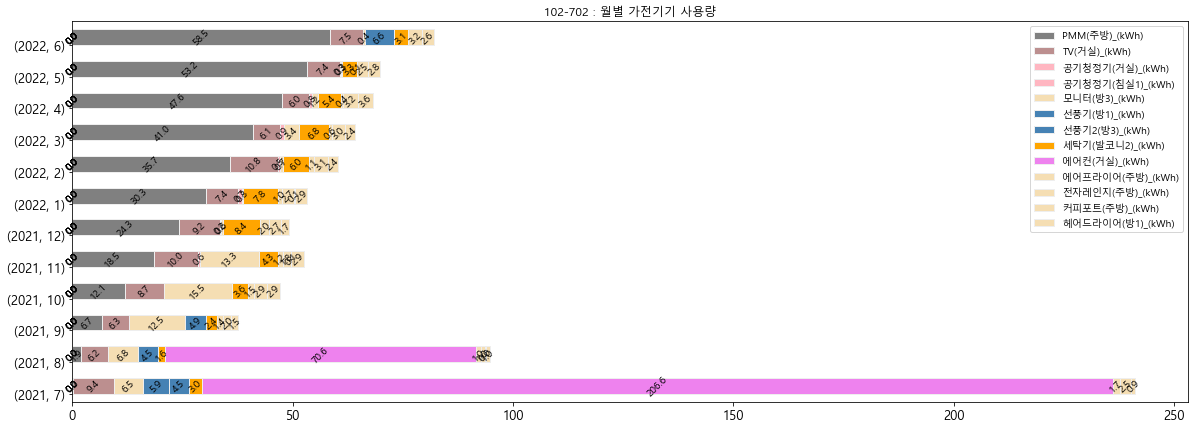

['presence_USM(거실)', 'presence_USM(방1)', 'presence_USM(침실2)']

In [24]:
dong = '102'
ho = '702'
df_real_appliance, df_cum_appliance, ccm_columns = load_df(dong,ho)
analysis(dong,ho)

##### List Up

---
1. 상위 3개 Appliance
    * TV(거실)      ->      USM(거실)
    * 선풍기        ->      USM(방1) (수집 제대로 안됨)

#### TV(거실) : 불필요한 에너지 소비 EDA

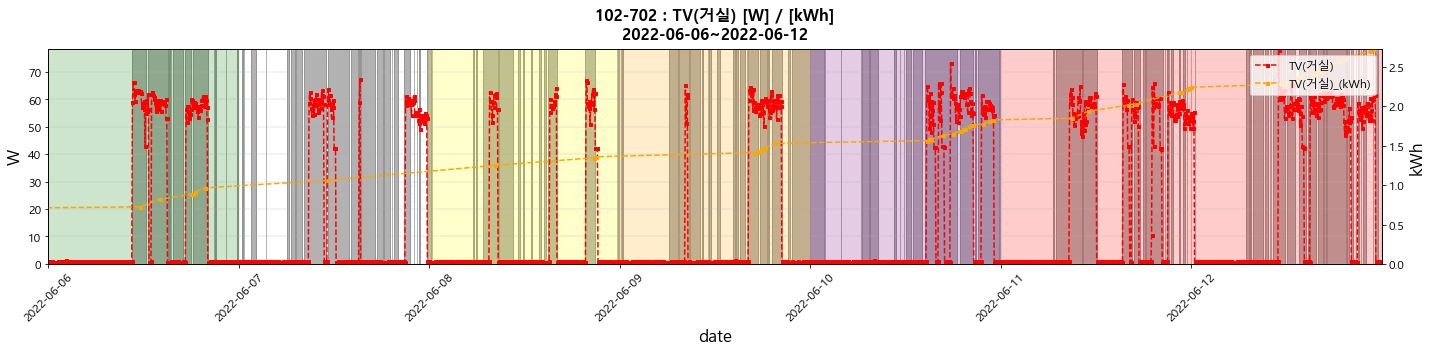

재실유무를 고려 X 사용량 : 2.829 kWh
재실유무를 고려 O 사용량 : 1.981 kWh
절감율 : 30.0


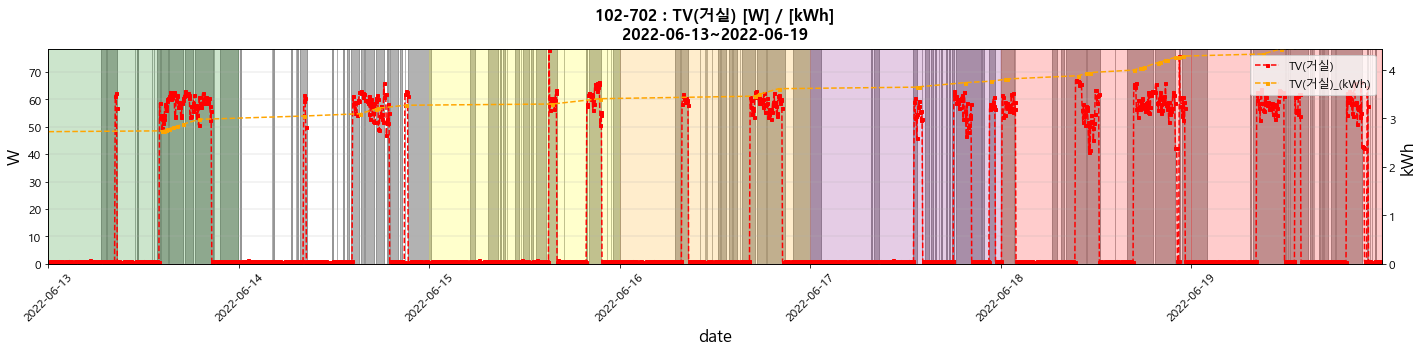

재실유무를 고려 X 사용량 : 2.547 kWh
재실유무를 고려 O 사용량 : 1.95 kWh
절감율 : 23.45


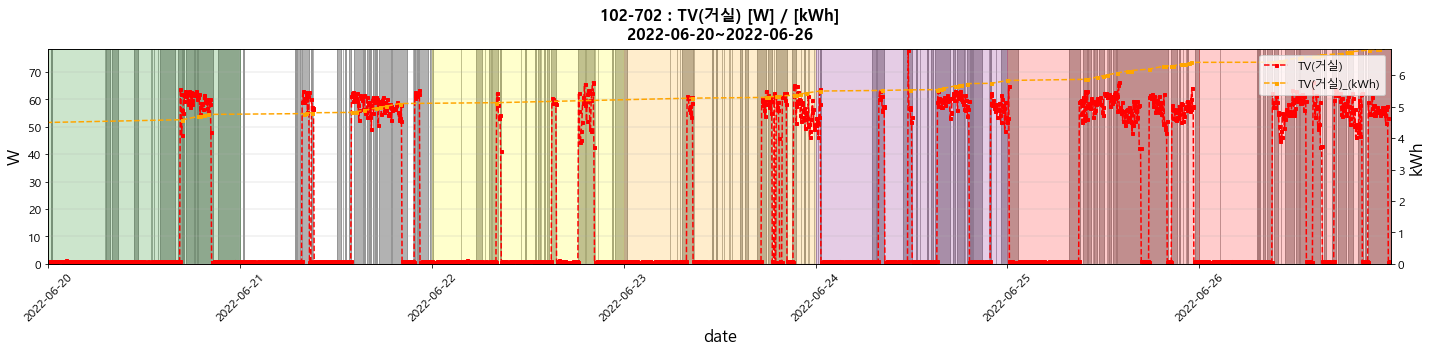

재실유무를 고려 X 사용량 : 3.181 kWh
재실유무를 고려 O 사용량 : 2.112 kWh
절감율 : 33.6


In [25]:
start_time = ["2022-06-06", "2022-06-13", "2022-06-20"]
end_time = ["2022-06-12 23:59:59", "2022-06-19 23:59:59", "2022-06-26 23:59:59"]
real_power_appliance = "TV(거실)" 
cum_power_appliance = "TV(거실)_(kWh)"
presence_USM = "presence_USM(거실)"

for i in range(3):
    EDA(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)
    # EDA_noCUM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noUSM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)

### 102동 709호 - 가전기기 EDA

#### 월별 사용량 상대 비교

<Figure size 1440x504 with 0 Axes>

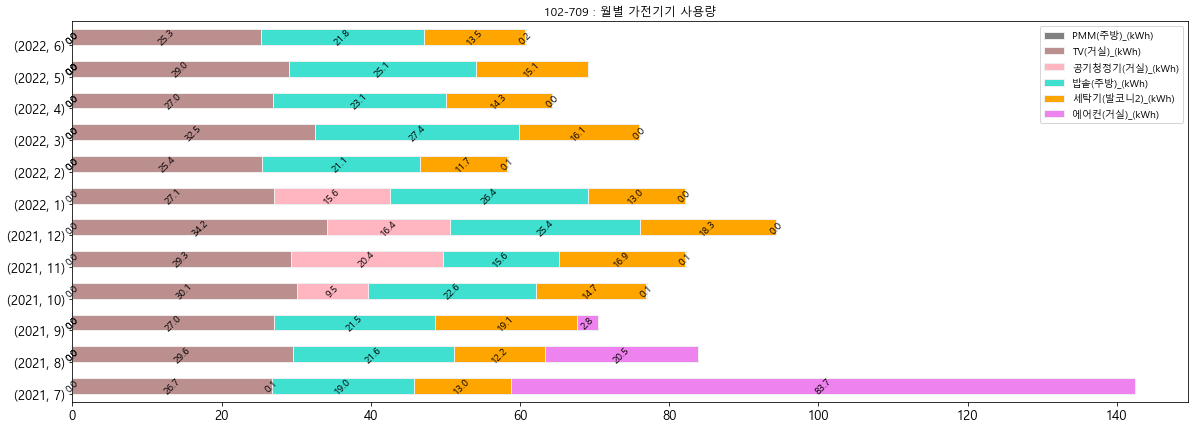

['presence_USM(거실)',
 'presence_USM(방1)',
 'presence_USM(침실2)',
 'presence_USM(침실3)']

In [26]:
dong = '102'
ho = '709'
df_real_appliance, df_cum_appliance, ccm_columns = load_df(dong,ho)
analysis(dong,ho)

##### List Up

---
1. 상위 3개 Appliance
    * TV(거실)      ->      USM(거실)
    * 밥솥        ->      USM(주방)
    * 세탁기        ->      안해도 될듯  

#### TV(거실) : 불필요한 에너지 소비 EDA

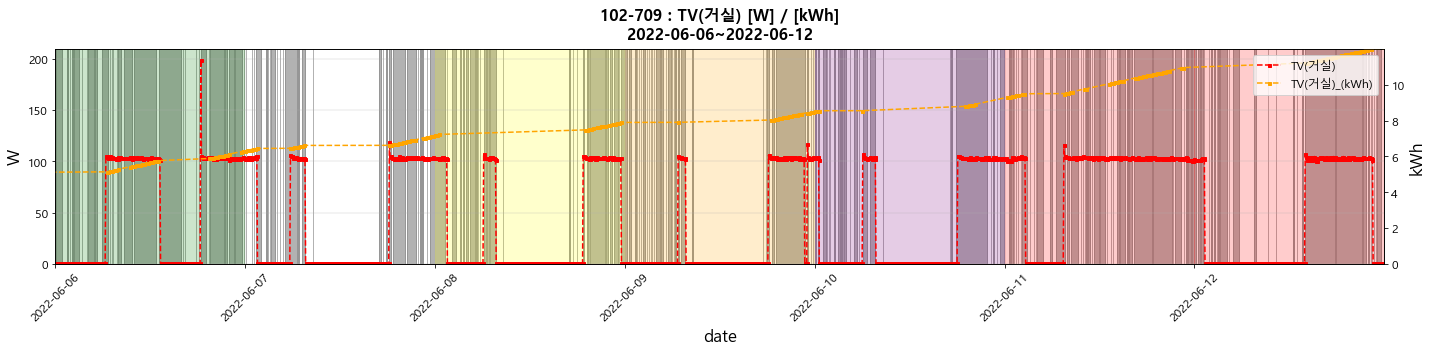

재실유무를 고려 X 사용량 : 7.658 kWh
재실유무를 고려 O 사용량 : 5.037 kWh
절감율 : 34.22


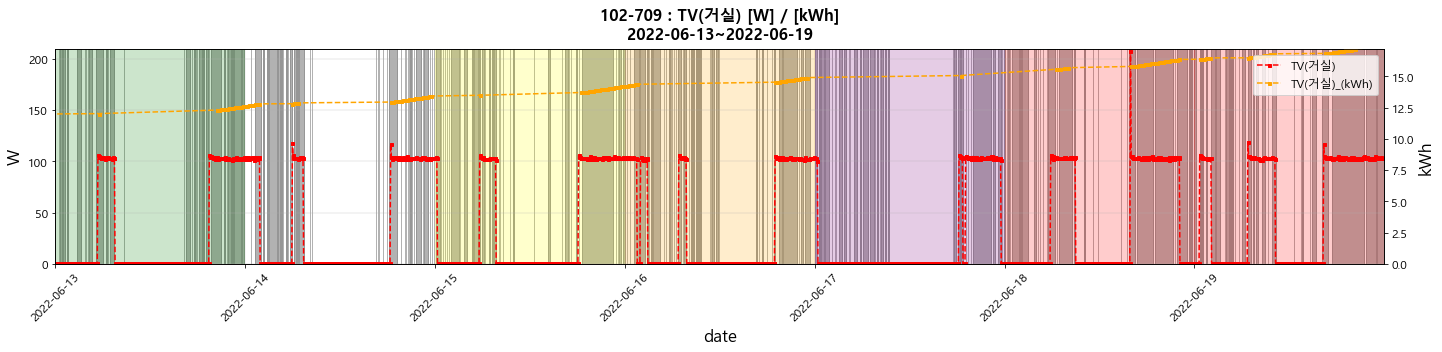

재실유무를 고려 X 사용량 : 6.266 kWh
재실유무를 고려 O 사용량 : 4.003 kWh
절감율 : 36.12


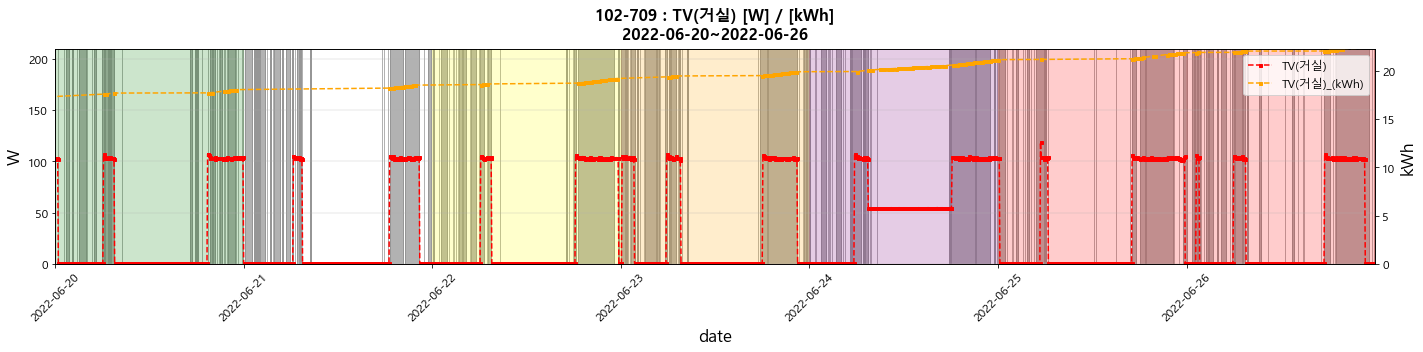

재실유무를 고려 X 사용량 : 5.712 kWh
재실유무를 고려 O 사용량 : 3.611 kWh
절감율 : 36.79


In [27]:
start_time = ["2022-06-06", "2022-06-13", "2022-06-20"]
end_time = ["2022-06-12 23:59:59", "2022-06-19 23:59:59", "2022-06-26 23:59:59"]
real_power_appliance = "TV(거실)" 
cum_power_appliance = "TV(거실)_(kWh)"
presence_USM = "presence_USM(거실)"

for i in range(3):
    EDA(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)
    # EDA_noCUM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noUSM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)

#### 전기밥솥(주방) : 불필요한 에너지 소비 EDA

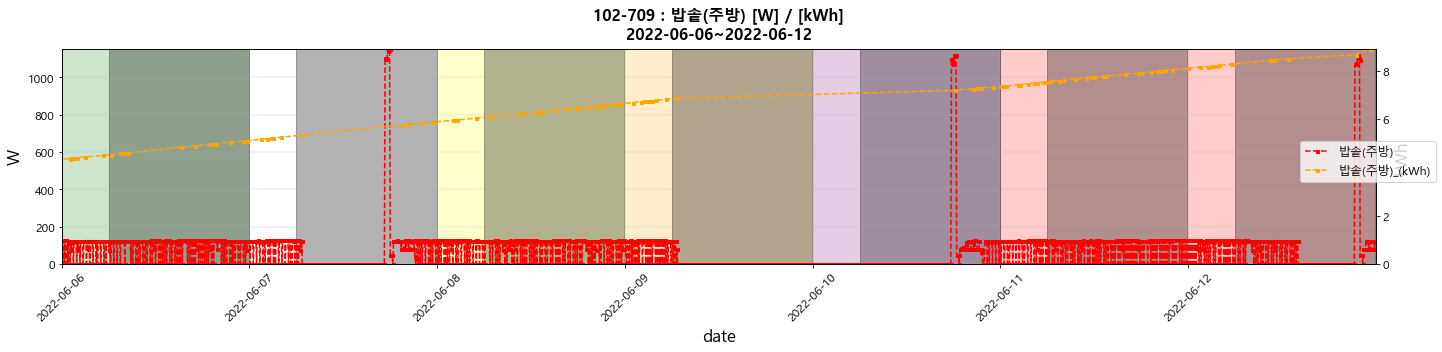

새벽유무를 고려 X 사용량 : 12.632 kWh
새벽유무를 고려 O 사용량 : 7.922 kWh
절감율 : 37.28


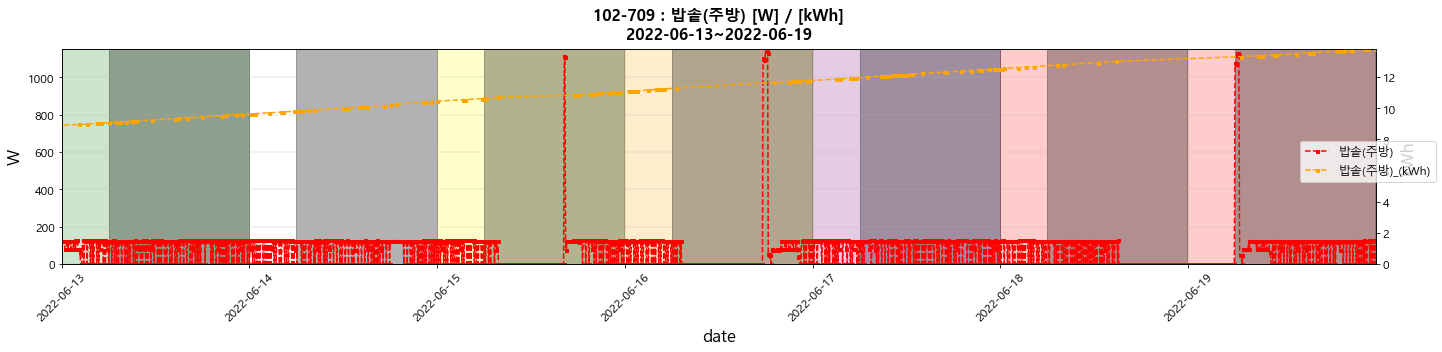

새벽유무를 고려 X 사용량 : 13.872 kWh
새벽유무를 고려 O 사용량 : 8.971 kWh
절감율 : 35.33


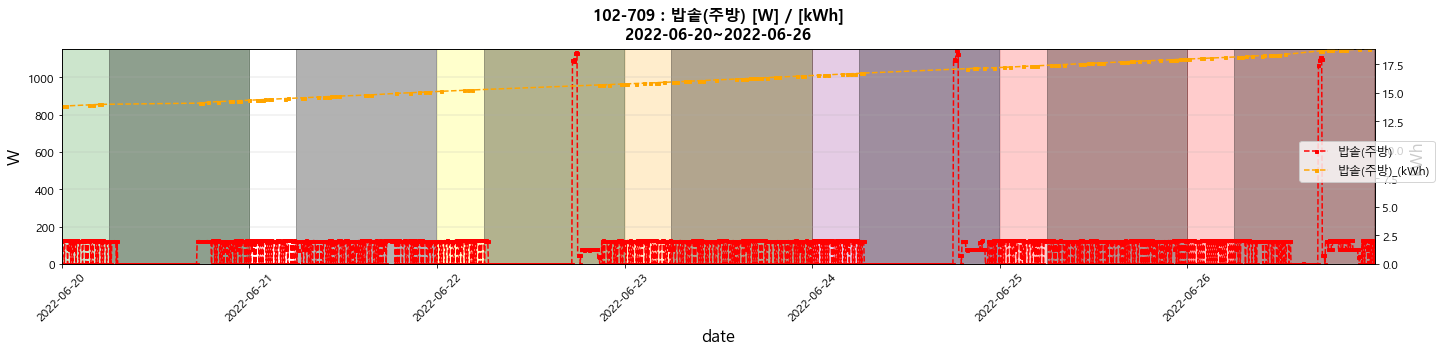

새벽유무를 고려 X 사용량 : 13.887 kWh
새벽유무를 고려 O 사용량 : 8.525 kWh
절감율 : 38.61


In [28]:
start_time = ["2022-06-06", "2022-06-13", "2022-06-20"]
end_time = ["2022-06-12 23:59:59", "2022-06-19 23:59:59", "2022-06-26 23:59:59"]
real_power_appliance = "밥솥(주방)" 
cum_power_appliance = "밥솥(주방)_(kWh)"
presence_USM = "presence_USM(거실)"

for i in range(3):
    # EDA(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noCUM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noUSM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)
    EDA_control(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)

### 102동 901호 - 가전기기 EDA

#### 월별 사용량 상대 비교

<Figure size 1440x504 with 0 Axes>

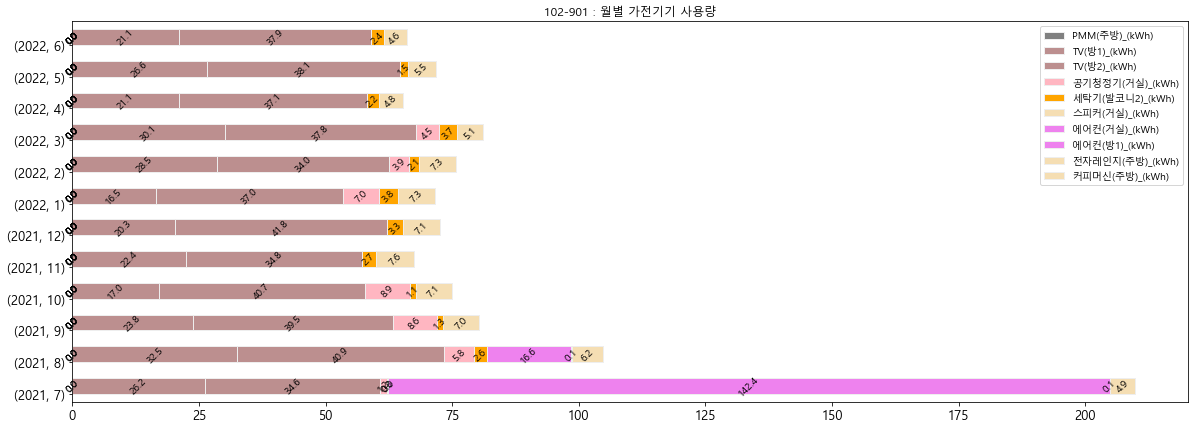

['presence_USM(거실)',
 'presence_USM(방1)',
 'presence_USM(침실2)',
 'presence_USM(침실3)']

In [29]:
dong = '102'
ho = '901'
df_real_appliance, df_cum_appliance, ccm_columns = load_df(dong,ho)
analysis(dong,ho)

##### List Up

---
1. 상위 3개 Appliance
    * TV(방1)      ->      USM(방1)
    * TV(방2)        ->      USM(침실2)

#### TV(방1) : 불필요한 에너지 소비 EDA

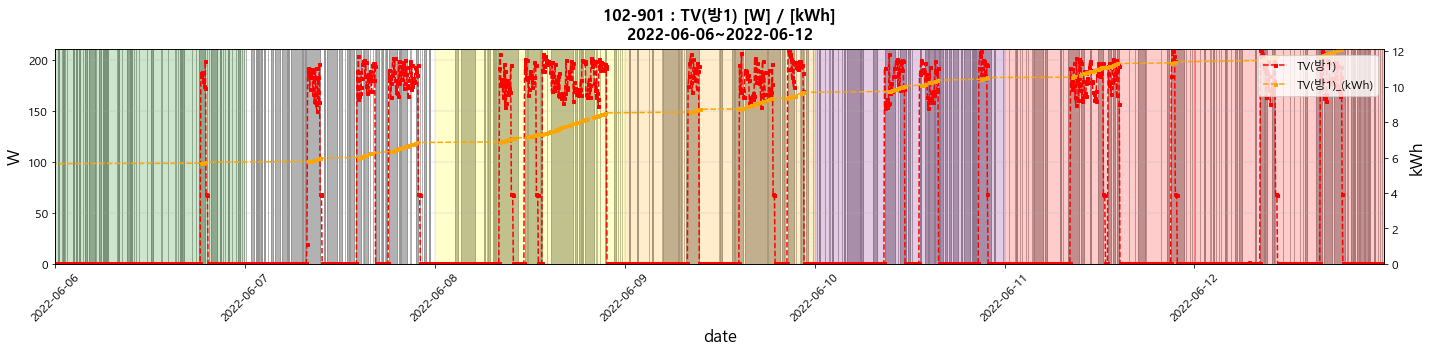

재실유무를 고려 X 사용량 : 8.345 kWh
재실유무를 고려 O 사용량 : 5.547 kWh
절감율 : 33.53


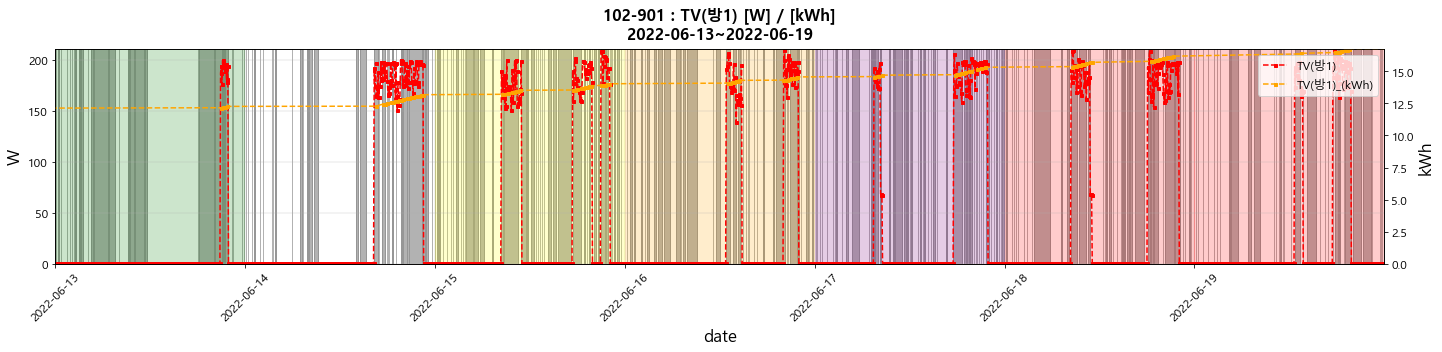

재실유무를 고려 X 사용량 : 6.111 kWh
재실유무를 고려 O 사용량 : 3.762 kWh
절감율 : 38.44


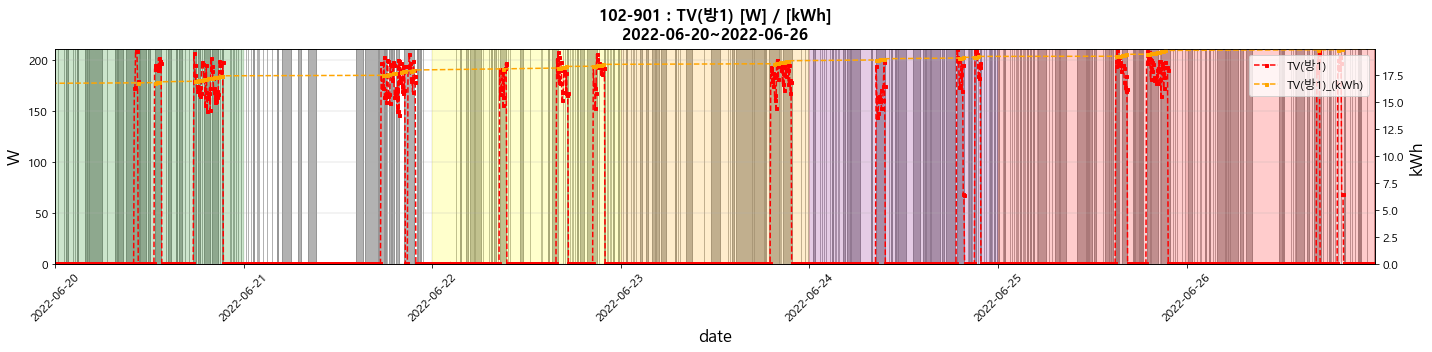

재실유무를 고려 X 사용량 : 4.529 kWh
재실유무를 고려 O 사용량 : 2.963 kWh
절감율 : 34.57


In [30]:
start_time = ["2022-06-06", "2022-06-13", "2022-06-20"]
end_time = ["2022-06-12 23:59:59", "2022-06-19 23:59:59", "2022-06-26 23:59:59"]
real_power_appliance = "TV(방1)" 
cum_power_appliance = "TV(방1)_(kWh)"
presence_USM = "presence_USM(방1)"

for i in range(3):
    EDA(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)
    # EDA_noCUM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noUSM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)

#### TV(방2) : 불필요한 에너지 소비 EDA

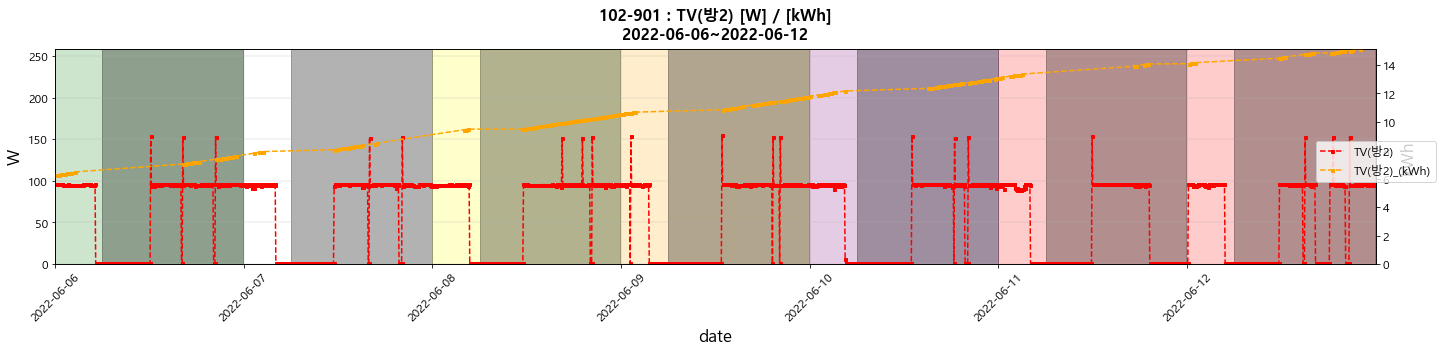

새벽유무를 고려 X 사용량 : 10.131 kWh
새벽유무를 고려 O 사용량 : 6.113 kWh
절감율 : 39.66


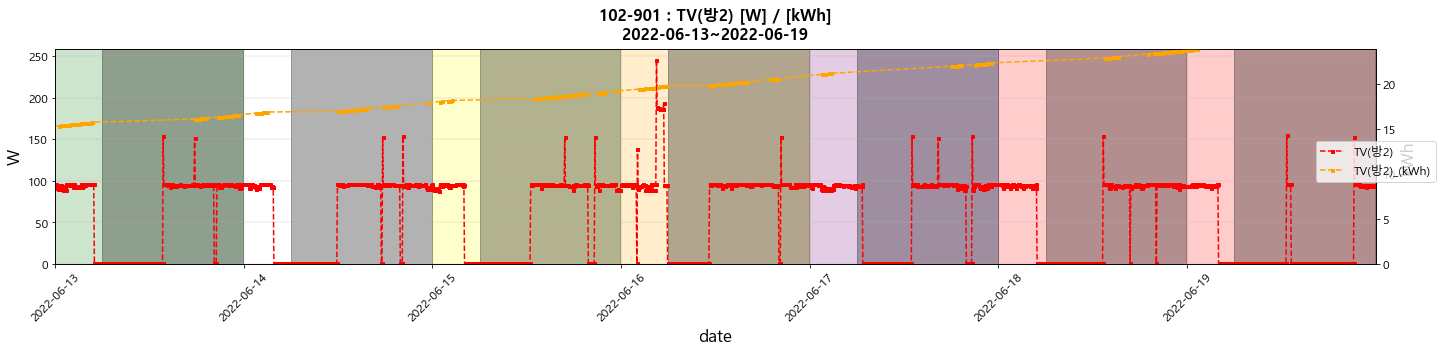

새벽유무를 고려 X 사용량 : 9.98 kWh
새벽유무를 고려 O 사용량 : 5.699 kWh
절감율 : 42.9


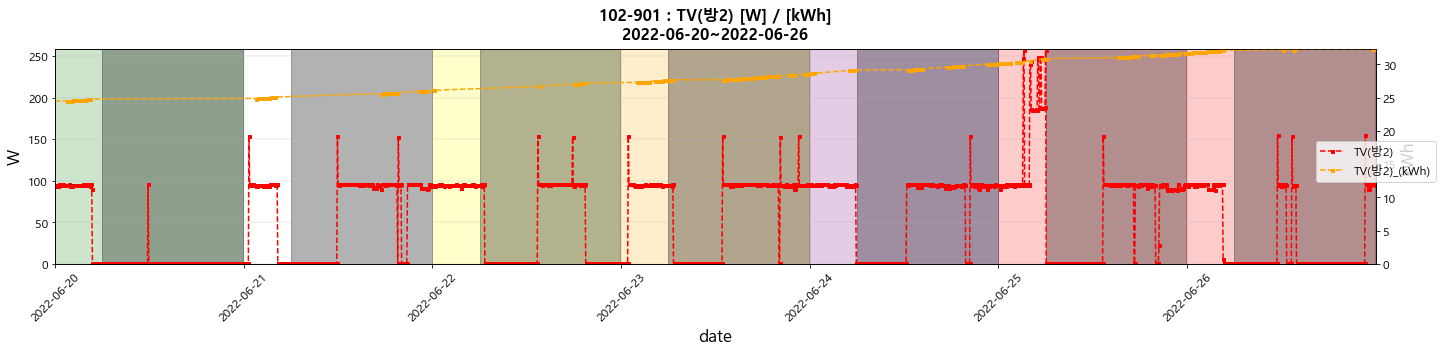

새벽유무를 고려 X 사용량 : 8.927 kWh
새벽유무를 고려 O 사용량 : 4.466 kWh
절감율 : 49.97


In [32]:
start_time = ["2022-06-06", "2022-06-13", "2022-06-20"]
end_time = ["2022-06-12 23:59:59", "2022-06-19 23:59:59", "2022-06-26 23:59:59"]
real_power_appliance = "TV(방2)" 
cum_power_appliance = "TV(방2)_(kWh)"
presence_USM = "presence_USM(침실2)"

for i in range(3):
    # EDA(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noCUM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noUSM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)
    EDA_control(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)

### 102동 908호 - 가전기기 EDA

#### 월별 사용량 상대 비교

<Figure size 1440x504 with 0 Axes>

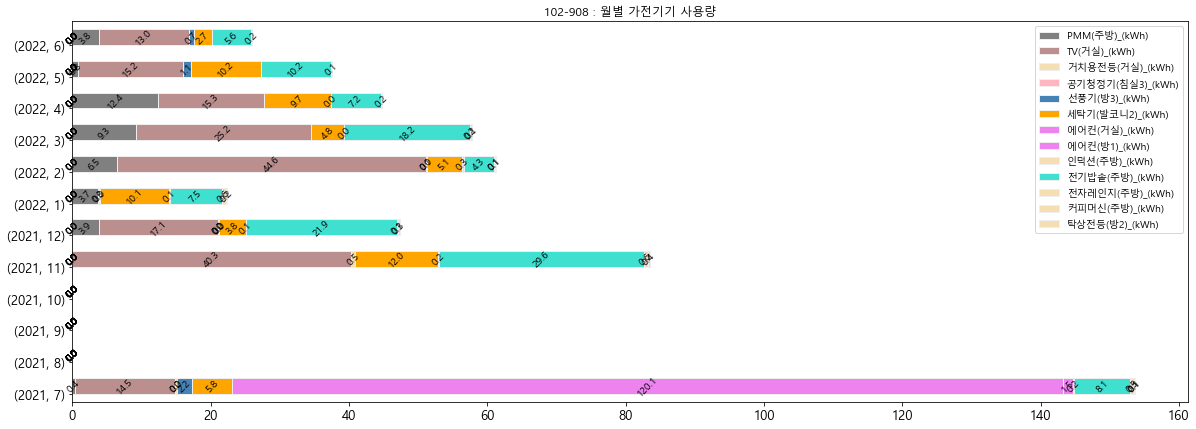

['presence_USM(거실)',
 'presence_USM(방1)',
 'presence_USM(방2)',
 'presence_USM(침실3)']

In [33]:
dong = '102'
ho = '908'
df_real_appliance, df_cum_appliance, ccm_columns = load_df(dong,ho)
analysis(dong,ho)

##### List Up

---
1. 상위 3개 Appliance
    * TV(거실)      ->      USM(거실)
    * 전기밥솥(주방)        ->      USM(침실2)
    * 세탁기        ->      안해도 될듯  

#### TV(거실) : 불필요한 에너지 소비 EDA

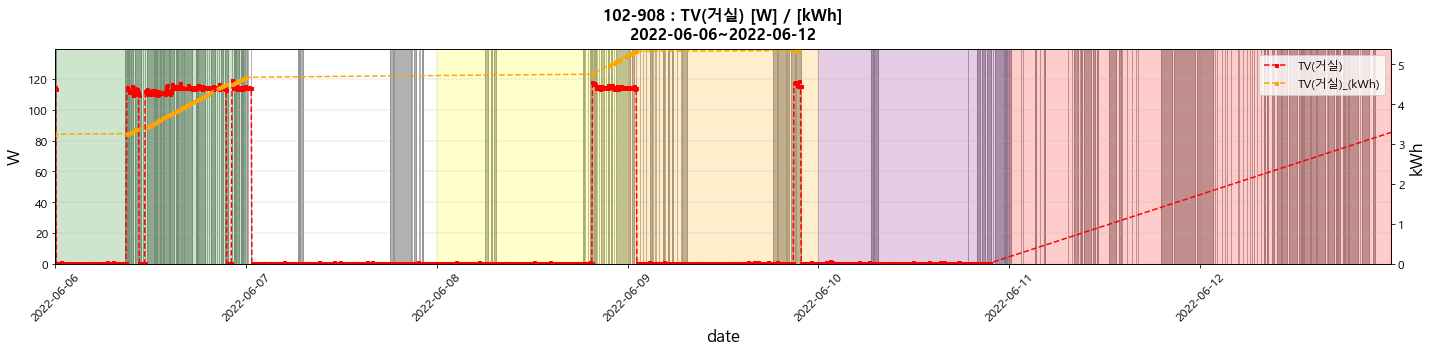

재실유무를 고려 X 사용량 : 2.467 kWh
재실유무를 고려 O 사용량 : 1.536 kWh
절감율 : 37.74


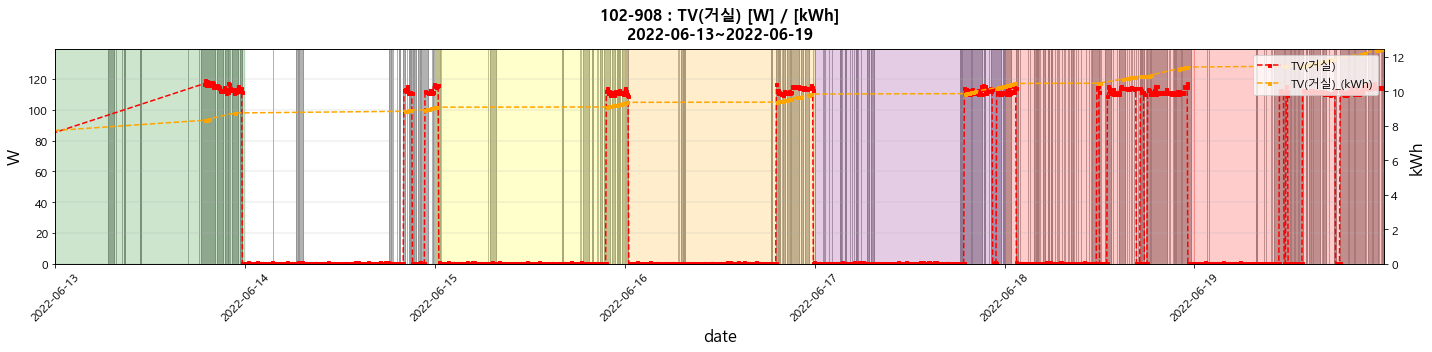

재실유무를 고려 X 사용량 : 4.747 kWh
재실유무를 고려 O 사용량 : 3.064 kWh
절감율 : 35.45


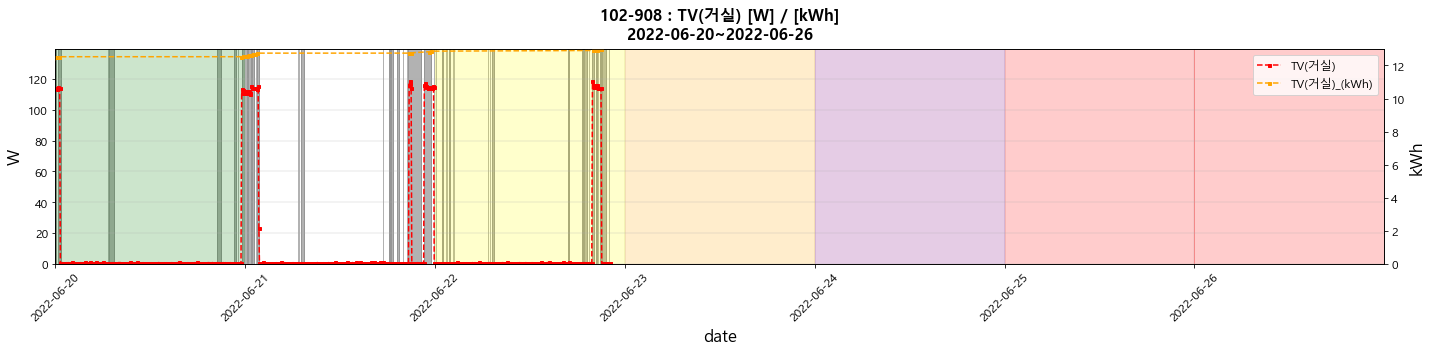

재실유무를 고려 X 사용량 : 0.687 kWh
재실유무를 고려 O 사용량 : 0.435 kWh
절감율 : 36.59


In [34]:
start_time = ["2022-06-06", "2022-06-13", "2022-06-20"]
end_time = ["2022-06-12 23:59:59", "2022-06-19 23:59:59", "2022-06-26 23:59:59"]
real_power_appliance = "TV(거실)" 
cum_power_appliance = "TV(거실)_(kWh)"
presence_USM = "presence_USM(거실)"

for i in range(3):
    EDA(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)
    # EDA_noCUM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noUSM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)

#### 전기밥솥(주방) : 불필요한 에너지 소비 EDA

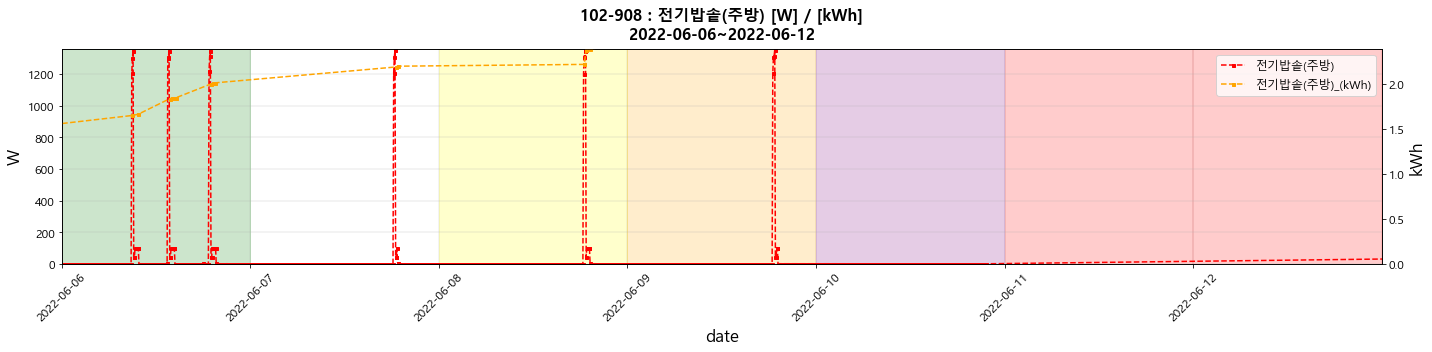

재실유무를 고려 X 사용량 : 2.545 kWh


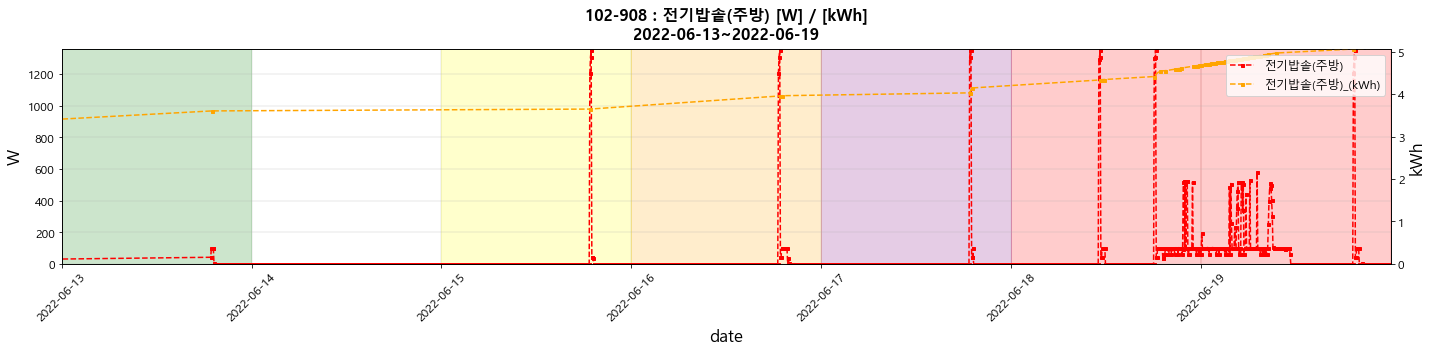

재실유무를 고려 X 사용량 : 4.725 kWh


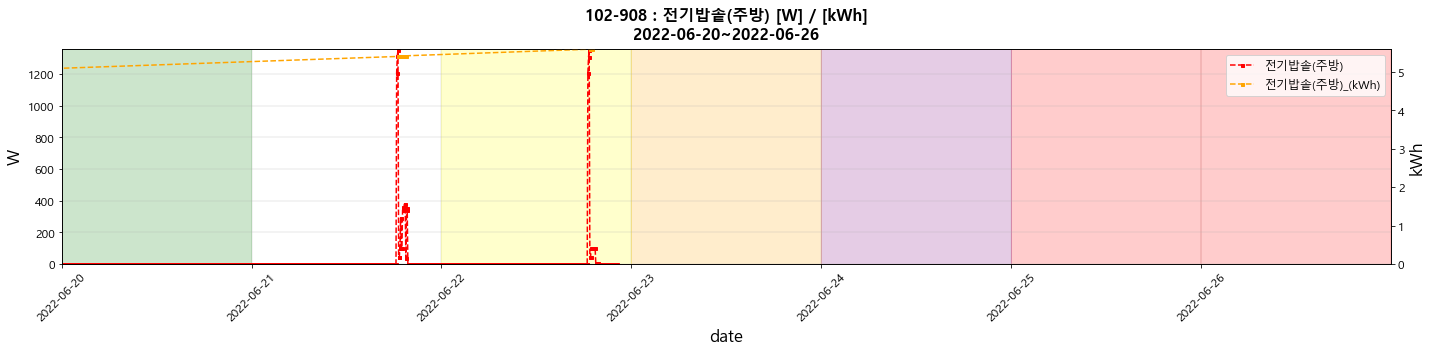

재실유무를 고려 X 사용량 : 1.053 kWh


In [35]:
start_time = ["2022-06-06", "2022-06-13", "2022-06-20"]
end_time = ["2022-06-12 23:59:59", "2022-06-19 23:59:59", "2022-06-26 23:59:59"]
real_power_appliance = "전기밥솥(주방)" 
cum_power_appliance = "전기밥솥(주방)_(kWh)"
presence_USM = "presence_USM(거실)"

for i in range(3):
# EDA(start_time,end_time,real_power_appliance,cum_power_appliance,presence_USM)
# EDA_noCUM(start_time,end_time,real_power_appliance,cum_power_appliance,presence_USM)
    EDA_noUSM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)

### 102동 1007호 - 가전기기 EDA

#### 월별 사용량 상대 비교

<Figure size 1440x504 with 0 Axes>

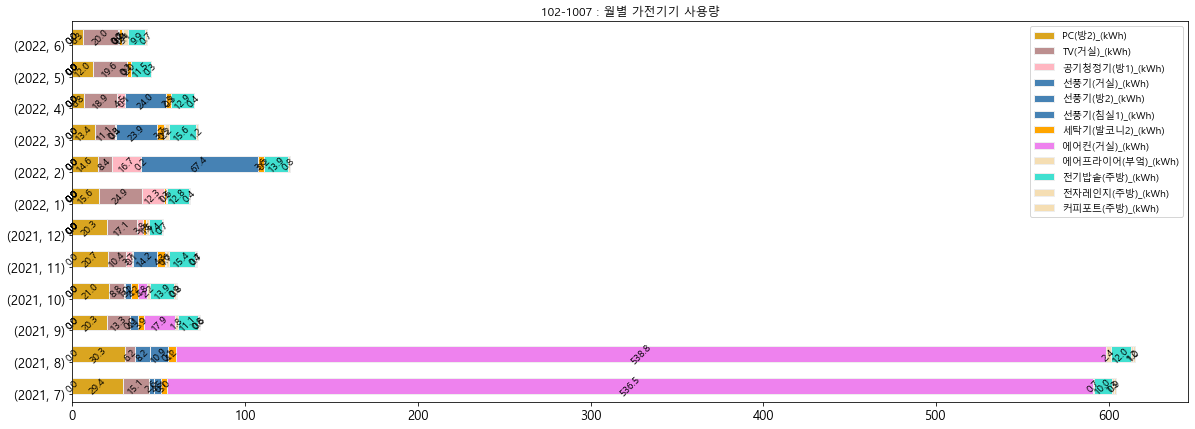

['presence_USM(거실)',
 'presence_USM(방1)',
 'presence_USM(방2)',
 'presence_USM(방3)']

In [36]:
dong = '102'
ho = '1007'
df_real_appliance, df_cum_appliance, ccm_columns = load_df(dong,ho)
analysis(dong,ho)

##### List Up

---
1. 상위 3개 Appliance
    * PC(방2)           ->      USM(방2)
    * TV(거실)          ->      USM(거실)
    * 전기밥솥          ->      USM(거실)  

#### PC(방2) : 불필요한 에너지 소비 EDA

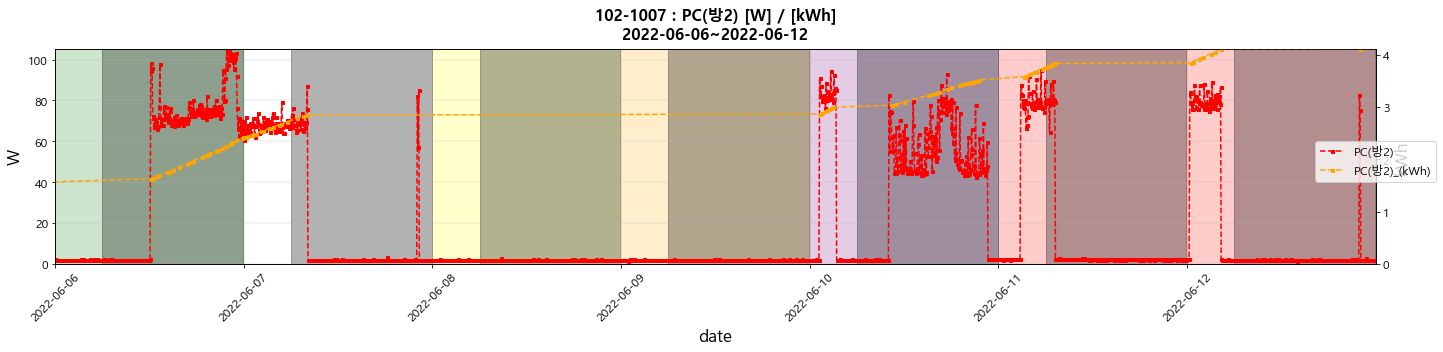

새벽유무를 고려 X 사용량 : 3.318 kWh
새벽유무를 고려 O 사용량 : 1.79 kWh
절감율 : 46.04


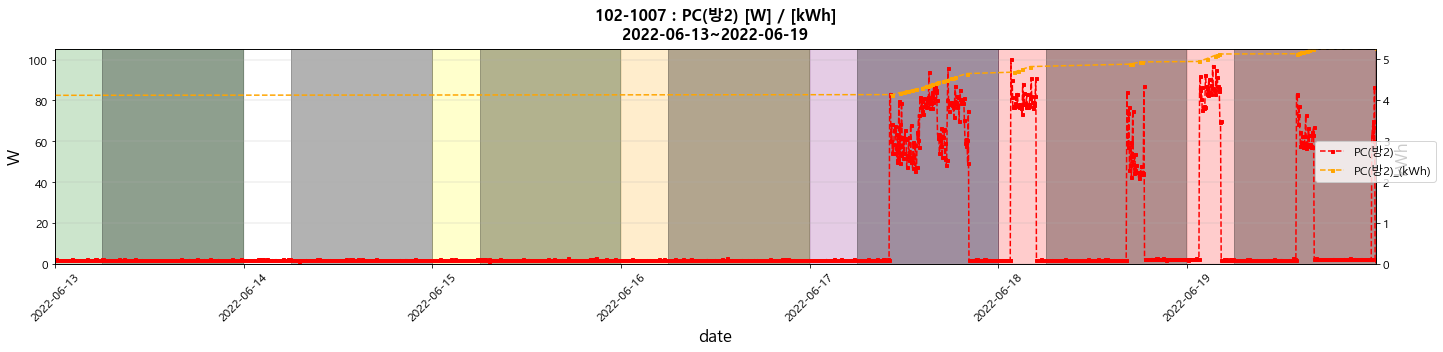

새벽유무를 고려 X 사용량 : 1.767 kWh
새벽유무를 고려 O 사용량 : 1.023 kWh
절감율 : 42.11


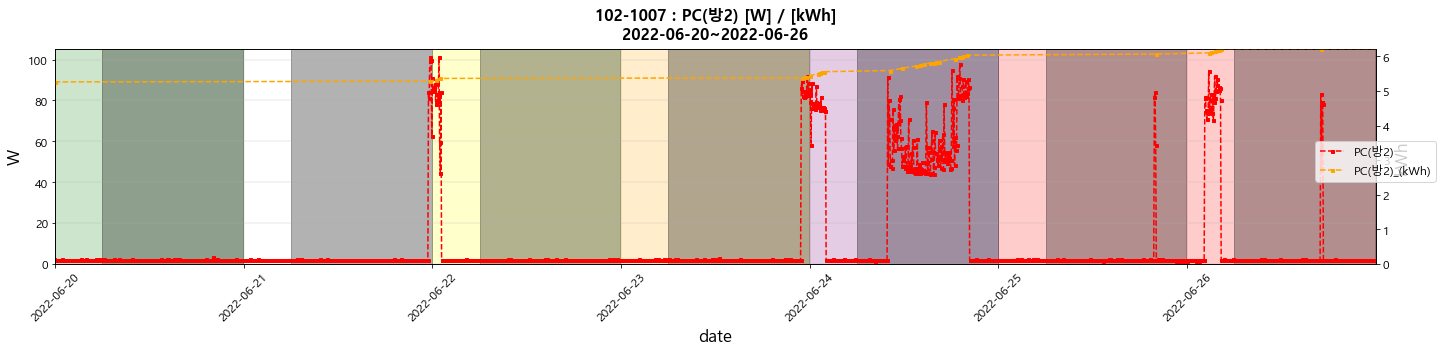

새벽유무를 고려 X 사용량 : 1.52 kWh
새벽유무를 고려 O 사용량 : 0.871 kWh
절감율 : 42.73


In [37]:
start_time = ["2022-06-06", "2022-06-13", "2022-06-20"]
end_time = ["2022-06-12 23:59:59", "2022-06-19 23:59:59", "2022-06-26 23:59:59"]
real_power_appliance = "PC(방2)" 
cum_power_appliance = "PC(방2)_(kWh)"
presence_USM = "presence_USM(방2)"

for i in range(3):
    # EDA(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)
    # EDA_noCUM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noUSM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    EDA_control(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)
    # print("----"*40)

#### TV(거실) : 불필요한 에너지 소비 EDA

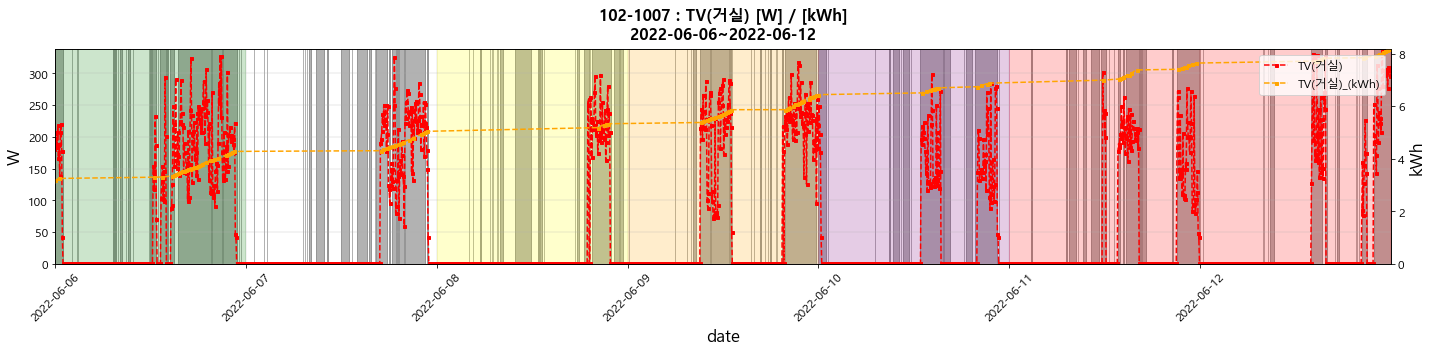

재실유무를 고려 X 사용량 : 8.717 kWh
재실유무를 고려 O 사용량 : 6.917 kWh
절감율 : 20.65


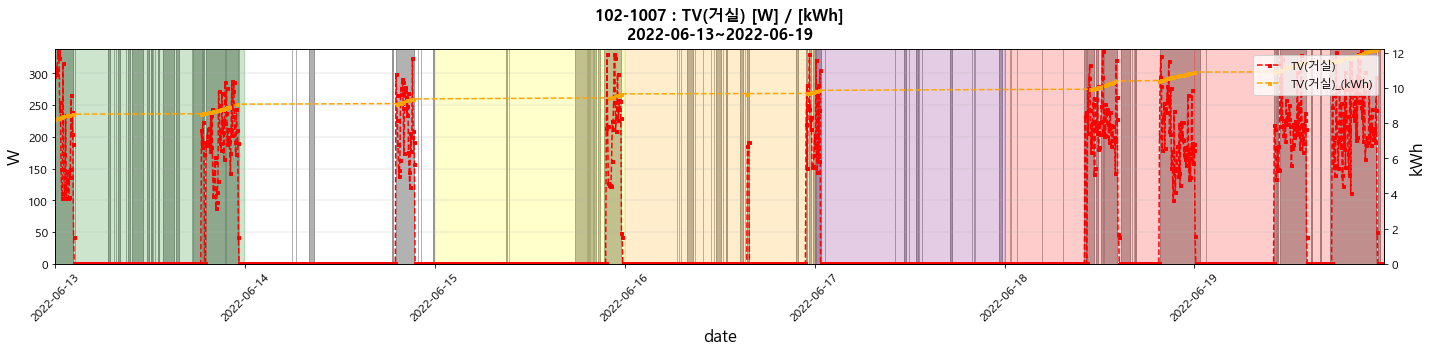

재실유무를 고려 X 사용량 : 6.912 kWh
재실유무를 고려 O 사용량 : 5.574 kWh
절감율 : 19.35


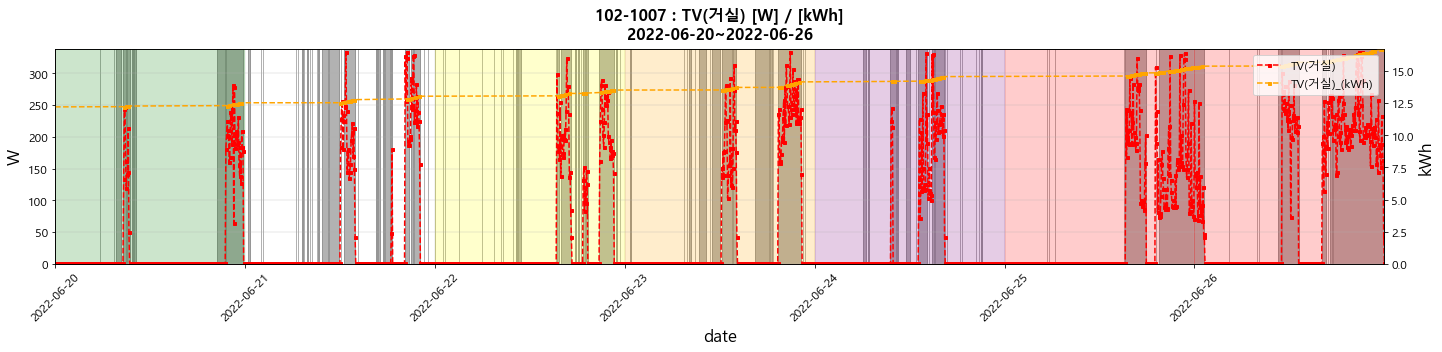

재실유무를 고려 X 사용량 : 7.749 kWh
재실유무를 고려 O 사용량 : 6.17 kWh
절감율 : 20.38


In [38]:
start_time = ["2022-06-06", "2022-06-13", "2022-06-20"]
end_time = ["2022-06-12 23:59:59", "2022-06-19 23:59:59", "2022-06-26 23:59:59"]
real_power_appliance = "TV(거실)" 
cum_power_appliance = "TV(거실)_(kWh)"
presence_USM = "presence_USM(거실)"

for i in range(3):
    EDA(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)
    # EDA_noCUM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noUSM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)

#### 전기밥솥(주방) : 불필요한 에너지 소비 EDA

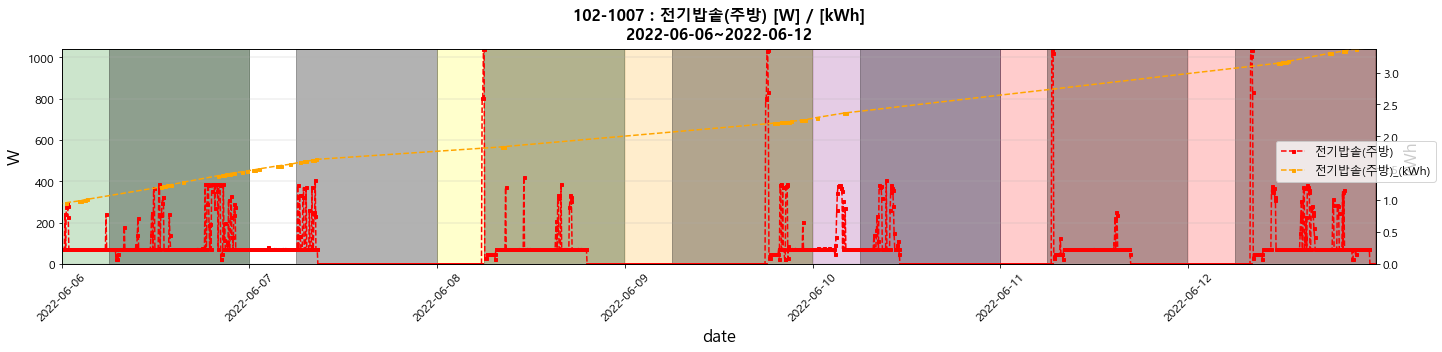

새벽유무를 고려 X 사용량 : 10.228 kWh
새벽유무를 고려 O 사용량 : 7.079 kWh
절감율 : 30.79


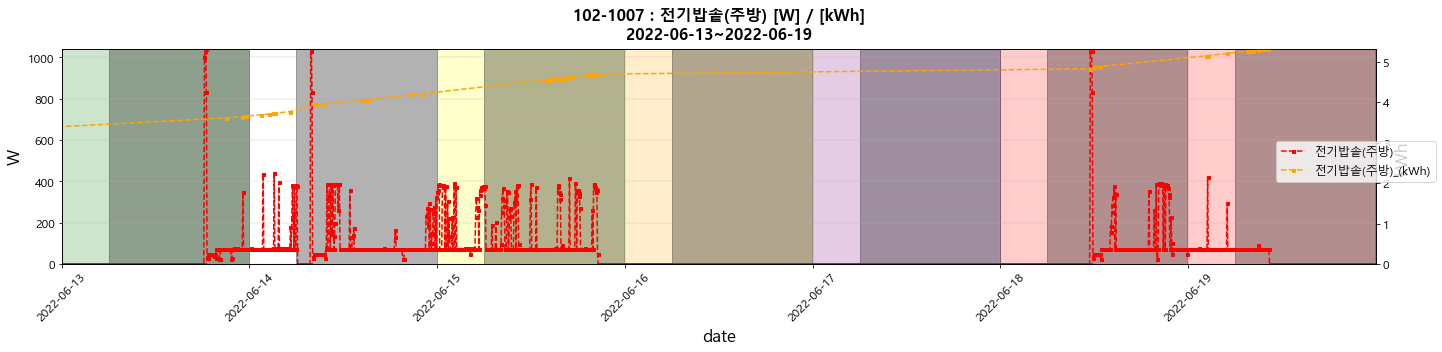

새벽유무를 고려 X 사용량 : 8.979 kWh
새벽유무를 고려 O 사용량 : 5.81 kWh
절감율 : 35.29


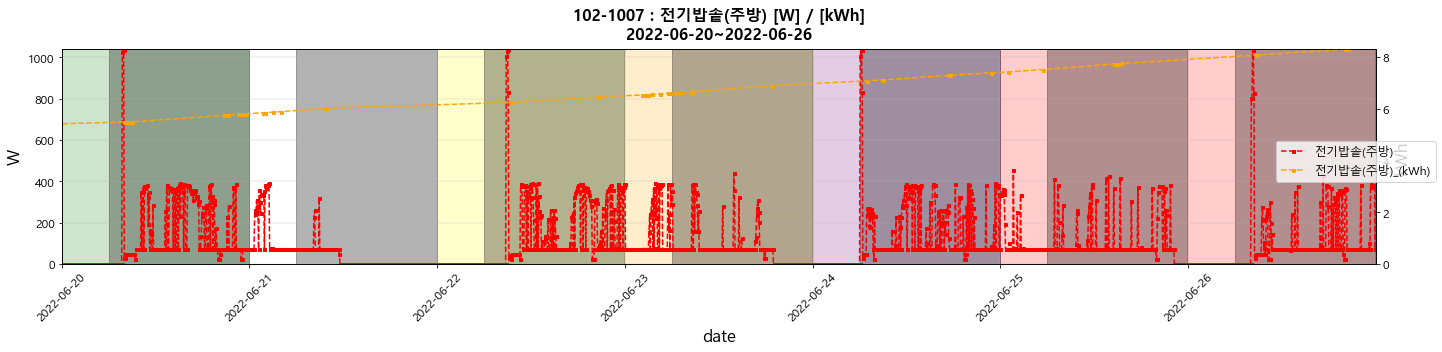

새벽유무를 고려 X 사용량 : 17.664 kWh
새벽유무를 고려 O 사용량 : 12.93 kWh
절감율 : 26.8


In [39]:
start_time = ["2022-06-06", "2022-06-13", "2022-06-20"]
end_time = ["2022-06-12 23:59:59", "2022-06-19 23:59:59", "2022-06-26 23:59:59"]
real_power_appliance = "전기밥솥(주방)" 
cum_power_appliance = "전기밥솥(주방)_(kWh)"
presence_USM = "presence_USM(거실)"

for i in range(3):
    # EDA(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noCUM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM)
    # EDA_noUSM(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)
    EDA_control(start_time[i],end_time[i],real_power_appliance,cum_power_appliance,presence_USM,df_real_appliance,df_cum_appliance,dong,ho)
    # print("----"*40)